## 해당 파일은 ulsan에 대해서만 다루므로 변수명에서 ulsan이라는 명칭을 제외한다

In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta
from glob import glob
import matplotlib.pyplot as plt


#pip install plotly
import plotly.express as px

pd.options.plotting.backend='plotly'

import plotly.io as pio
pio.renderers.default="notebook_connected"

import warnings
warnings.filterwarnings('ignore')

import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

### 앞서 생성한 시단대별 에너지 데이터와 가장 최근의 예보 데이터를 활용해 eda해본다

In [3]:
energy= pd.read_csv("ulsan_energy_time.csv")
fcst=pd.read_csv("ulsan_last_fcst.csv")

In [4]:
energy

,date,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2018-03-01,0.0,4.0,35.0,71.0,82.0,334.0,372.0,346.0,318.0,258.0,160.0,30.0,0.0
1,2018-03-02,0.0,18.0,102.0,218.0,264.0,278.0,362.0,352.0,319.0,263.0,163.0,30.0,0.0
2,2018-03-03,0.0,14.0,75.0,103.0,167.0,143.0,168.0,256.0,311.0,250.0,151.0,31.0,0.0
3,2018-03-04,0.0,20.0,91.0,166.0,257.0,264.0,200.0,105.0,86.0,43.0,20.0,1.0,0.0
4,2018-03-05,0.0,0.0,0.0,3.0,0.0,8.0,14.0,21.0,22.0,21.0,16.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,2021-01-27,0.0,1.0,46.0,148.0,240.0,290.0,306.0,303.0,269.0,199.0,72.0,6.0,0.0
1064,2021-01-28,0.0,0.0,17.0,75.0,160.0,249.0,294.0,294.0,256.0,130.0,77.0,8.0,0.0
1065,2021-01-29,0.0,1.0,56.0,160.0,250.0,310.0,331.0,327.0,289.0,218.0,91.0,6.0,0.0
1066,2021-01-30,0.0,1.0,44.0,144.0,228.0,238.0,292.0,297.0,231.0,140.0,50.0,7.0,0.0


In [5]:
fcst.head(20)

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time,Forecast time
0,8.0,20.0,14.0,298.0,2.0,2018-03-01 15:00:00,2018-03-01 11:00:00
1,4.0,20.0,4.3,298.0,2.0,2018-03-01 18:00:00,2018-03-01 14:00:00
2,3.0,30.0,2.1,313.0,2.0,2018-03-01 21:00:00,2018-03-01 17:00:00
3,0.0,40.0,1.3,321.0,2.0,2018-03-02 00:00:00,2018-03-01 20:00:00
4,-1.0,45.0,1.8,299.0,2.0,2018-03-02 03:00:00,2018-03-01 23:00:00
5,-1.0,45.0,1.8,304.0,1.0,2018-03-02 06:00:00,2018-03-02 02:00:00
6,0.0,40.0,1.7,315.0,1.0,2018-03-02 09:00:00,2018-03-02 05:00:00
7,6.0,30.0,1.1,139.0,1.0,2018-03-02 12:00:00,2018-03-02 08:00:00
8,9.0,35.0,2.3,182.0,1.0,2018-03-02 15:00:00,2018-03-02 11:00:00
9,8.0,45.0,2.5,313.0,1.0,2018-03-02 18:00:00,2018-03-02 14:00:00


#### 15시 12시, 9시 예보 데이터는 존재하므로 이 데이터만을 활용해서 예측해본다

In [6]:
# 편의성을 위해 예보를 실행한 시간(Forecast time) 변수를 제거한다
fcst=fcst.drop(["Forecast time"],axis=1)
fcst

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
0,8.0,20.0,14.0,298.0,2.0,2018-03-01 15:00:00
1,4.0,20.0,4.3,298.0,2.0,2018-03-01 18:00:00
2,3.0,30.0,2.1,313.0,2.0,2018-03-01 21:00:00
3,0.0,40.0,1.3,321.0,2.0,2018-03-02 00:00:00
4,-1.0,45.0,1.8,299.0,2.0,2018-03-02 03:00:00
...,...,...,...,...,...,...
8783,9.0,45.0,3.1,83.0,3.0,2021-03-03 12:00:00
8784,9.0,45.0,3.0,111.0,3.0,2021-03-03 15:00:00
8785,8.0,55.0,2.2,122.0,3.0,2021-03-03 18:00:00
8786,6.0,65.0,0.9,131.0,3.0,2021-03-03 21:00:00


In [9]:
# 시간(hour) 변수 생성
fcst['hour']= fcst['Forecast_time'].str.split(' ').str[1].str.split(':').str[0].astype(int)
fcst['date']= fcst['Forecast_time'].str.split(' ').str[0]

fcst.head(10)

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time,hour,date
0,8.0,20.0,14.0,298.0,2.0,2018-03-01 15:00:00,15,2018-03-01
1,4.0,20.0,4.3,298.0,2.0,2018-03-01 18:00:00,18,2018-03-01
2,3.0,30.0,2.1,313.0,2.0,2018-03-01 21:00:00,21,2018-03-01
3,0.0,40.0,1.3,321.0,2.0,2018-03-02 00:00:00,0,2018-03-02
4,-1.0,45.0,1.8,299.0,2.0,2018-03-02 03:00:00,3,2018-03-02
5,-1.0,45.0,1.8,304.0,1.0,2018-03-02 06:00:00,6,2018-03-02
6,0.0,40.0,1.7,315.0,1.0,2018-03-02 09:00:00,9,2018-03-02
7,6.0,30.0,1.1,139.0,1.0,2018-03-02 12:00:00,12,2018-03-02
8,9.0,35.0,2.3,182.0,1.0,2018-03-02 15:00:00,15,2018-03-02
9,8.0,45.0,2.5,313.0,1.0,2018-03-02 18:00:00,18,2018-03-02


In [10]:
# 15시 데이터만 비교해보자
fcst_15=fcst[fcst['hour']==15].drop(['Forecast_time'],axis=1)
energy_15=energy[['date','15']]

In [11]:
#energy에 있는 변수만 사용
fcst_energy_15=fcst_15.iloc[:1068,:]

In [12]:
energy_15.isna().sum()
energy_15

,date,15
0,2018-03-01,318.0
1,2018-03-02,319.0
2,2018-03-03,311.0
3,2018-03-04,86.0
4,2018-03-05,22.0
...,...,...
1063,2021-01-27,269.0
1064,2021-01-28,256.0
1065,2021-01-29,289.0
1066,2021-01-30,231.0


In [13]:
#energy값 넣어준다
fcst_energy_15['energy']=list(energy_15['15'])

# hour제거
fcst_energy_15=fcst_energy_15.drop(['hour'],axis=1)
fcst_energy_15

# year montj day추가
fcst_energy_15['year'] = fcst_energy_15['date'].str.split('-').str[0].astype(int)
fcst_energy_15['month'] = fcst_energy_15['date'].str.split('-').str[1].astype(int)
fcst_energy_15['day'] = fcst_energy_15['date'].str.split('-').str[2].astype(int)

In [14]:
fcst_energy_15

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,date,energy,year,month,day
0,8.0,20.0,14.0,298.0,2.0,2018-03-01,318.0,2018,3,1
8,9.0,35.0,2.3,182.0,1.0,2018-03-02,319.0,2018,3,2
16,15.0,60.0,2.9,214.0,3.0,2018-03-03,311.0,2018,3,3
24,16.0,80.0,2.9,145.0,4.0,2018-03-04,86.0,2018,3,4
32,4.0,90.0,12.6,29.0,4.0,2018-03-05,22.0,2018,3,5
...,...,...,...,...,...,...,...,...,...,...
8504,11.0,35.0,4.1,16.0,1.0,2021-01-27,269.0,2021,1,27
8512,11.0,45.0,9.0,261.0,3.0,2021-01-28,256.0,2021,1,28
8520,2.0,20.0,6.5,305.0,1.0,2021-01-29,289.0,2021,1,29
8528,11.0,45.0,4.0,273.0,3.0,2021-01-30,231.0,2021,1,30


In [15]:
fcst_energy_15_2019=fcst_energy_15[fcst_energy_15['year']==2019]
fcst_energy_15_2019


,Temperature,Humidity,WindSpeed,WindDirection,Cloud,date,energy,year,month,day
2448,5.0,35.0,6.0,291.0,2.0,2019-01-01,249.0,2019,1,1
2456,5.0,25.0,4.7,306.0,1.0,2019-01-02,242.0,2019,1,2
2464,7.0,20.0,3.6,318.0,1.0,2019-01-03,253.0,2019,1,3
2472,9.0,30.0,1.5,262.0,2.0,2019-01-04,86.0,2019,1,4
2480,8.0,20.0,6.3,313.0,2.0,2019-01-05,222.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
5328,7.0,20.0,4.1,315.0,1.0,2019-12-27,249.0,2019,12,27
5336,9.0,30.0,2.6,313.0,1.0,2019-12-28,230.0,2019,12,28
5344,9.0,65.0,2.0,330.0,4.0,2019-12-29,33.0,2019,12,29
5352,16.0,55.0,3.6,287.0,3.0,2019-12-30,105.0,2019,12,30


In [16]:
fig= px.line(fcst_energy_15_2019,x=fcst_energy_15_2019['date'],y=fcst_energy_15_2019['energy'])
fig.show()

In [17]:
fig= px.line(fcst_energy_15_2019,x=fcst_energy_15_2019['date'],y=100-fcst_energy_15_2019['Humidity'])
fig.show()

In [18]:
fig= px.line(fcst_energy_15_2019,x=fcst_energy_15_2019['date'],y=fcst_energy_15_2019['Temperature'])
fig.show()

In [19]:
fig= px.line(fcst_energy_15_2019,x=fcst_energy_15_2019['date'],y=fcst_energy_15_2019['Cloud'])
fig.show()

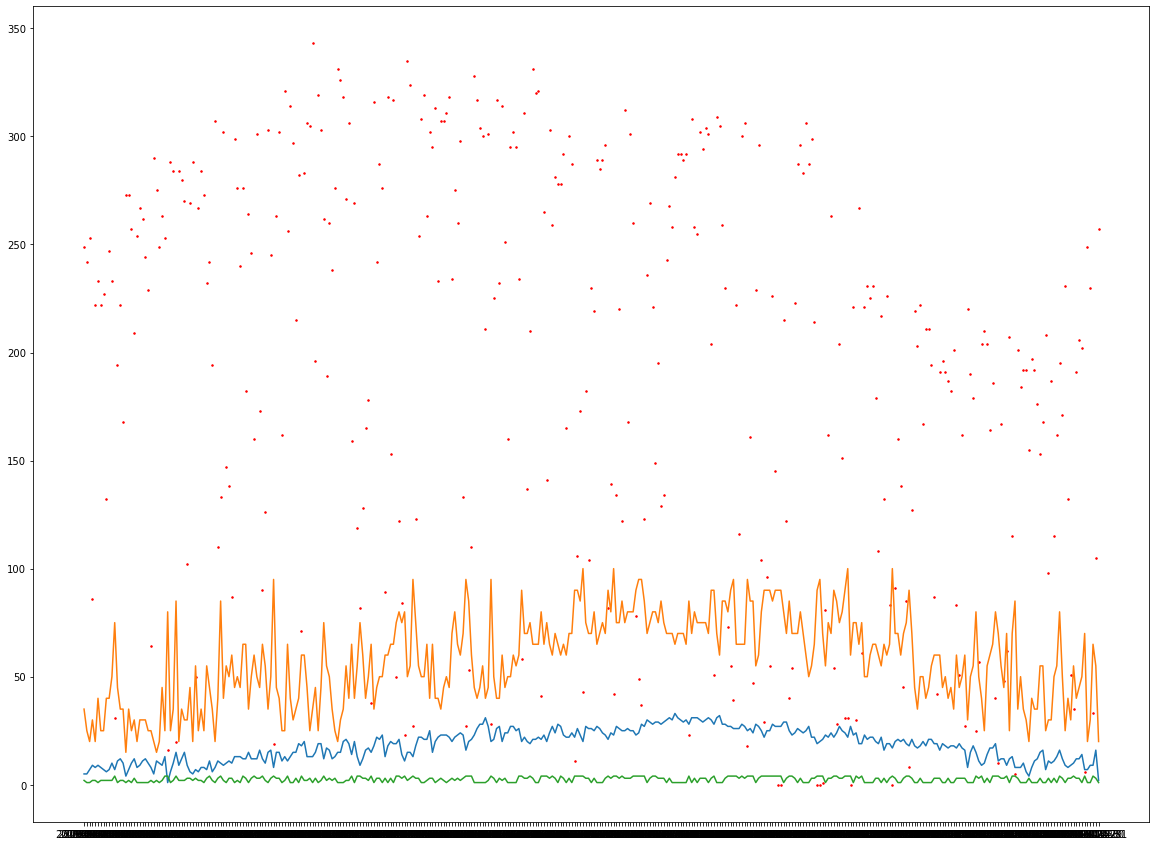

In [20]:
plt.figure(figsize=(20,15))

plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['energy'],'o',c='r',markersize=1.5)
plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['Temperature'],markersize=1)
plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['Humidity'],markersize=1)
plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['Cloud'],markersize=1)



In [30]:
data=fcst_energy_15_2019[['Temperature','Humidity','Cloud','energy']]

from sklearn.preprocessing import MinMaxScaler
minMaxScaler=MinMaxScaler()

minMaxScaler.fit(data)
data_minMaxScaled = minMaxScaler.transform(data)
data_minMaxScaled=pd.DataFrame(data_minMaxScaled)
data_minMaxScaled.columns=[['Temperature','Humidity','Cloud','energy']]
data_minMaxScaled['date']=list(fcst_energy_15_2019['date'])
list(data_minMaxScaled.iloc[:,1])
data_minMaxScaled

,Temperature,Humidity,Cloud,energy,date
0,0.12500,0.235294,0.333333,0.725948,2019-01-01
1,0.12500,0.117647,0.000000,0.705539,2019-01-02
2,0.18750,0.058824,0.000000,0.737609,2019-01-03
3,0.25000,0.176471,0.333333,0.250729,2019-01-04
4,0.21875,0.058824,0.333333,0.647230,2019-01-05
...,...,...,...,...,...
360,0.18750,0.058824,0.000000,0.725948,2019-12-27
361,0.25000,0.176471,0.000000,0.670554,2019-12-28
362,0.25000,0.588235,1.000000,0.096210,2019-12-29
363,0.46875,0.470588,0.666667,0.306122,2019-12-30


In [40]:
fcst_energy_15_2019['scale_temp']=list(data_minMaxScaled.iloc[:,0])
fcst_energy_15_2019['scale_Humidity']=list(data_minMaxScaled.iloc[:,1])
fcst_energy_15_2019['scale_Cloud']=list(data_minMaxScaled.iloc[:,2])
fcst_energy_15_2019['scale_energy']=list(data_minMaxScaled.iloc[:,3])


fcst_energy_15_2019

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,date,energy,year,month,day,scale_temp,scale_Humidity,scale_Cloud,scale_energy
2448,5.0,35.0,6.0,291.0,2.0,2019-01-01,249.0,2019,1,1,0.12500,0.235294,0.333333,0.725948
2456,5.0,25.0,4.7,306.0,1.0,2019-01-02,242.0,2019,1,2,0.12500,0.117647,0.000000,0.705539
2464,7.0,20.0,3.6,318.0,1.0,2019-01-03,253.0,2019,1,3,0.18750,0.058824,0.000000,0.737609
2472,9.0,30.0,1.5,262.0,2.0,2019-01-04,86.0,2019,1,4,0.25000,0.176471,0.333333,0.250729
2480,8.0,20.0,6.3,313.0,2.0,2019-01-05,222.0,2019,1,5,0.21875,0.058824,0.333333,0.647230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,7.0,20.0,4.1,315.0,1.0,2019-12-27,249.0,2019,12,27,0.18750,0.058824,0.000000,0.725948
5336,9.0,30.0,2.6,313.0,1.0,2019-12-28,230.0,2019,12,28,0.25000,0.176471,0.000000,0.670554
5344,9.0,65.0,2.0,330.0,4.0,2019-12-29,33.0,2019,12,29,0.25000,0.588235,1.000000,0.096210
5352,16.0,55.0,3.6,287.0,3.0,2019-12-30,105.0,2019,12,30,0.46875,0.470588,0.666667,0.306122


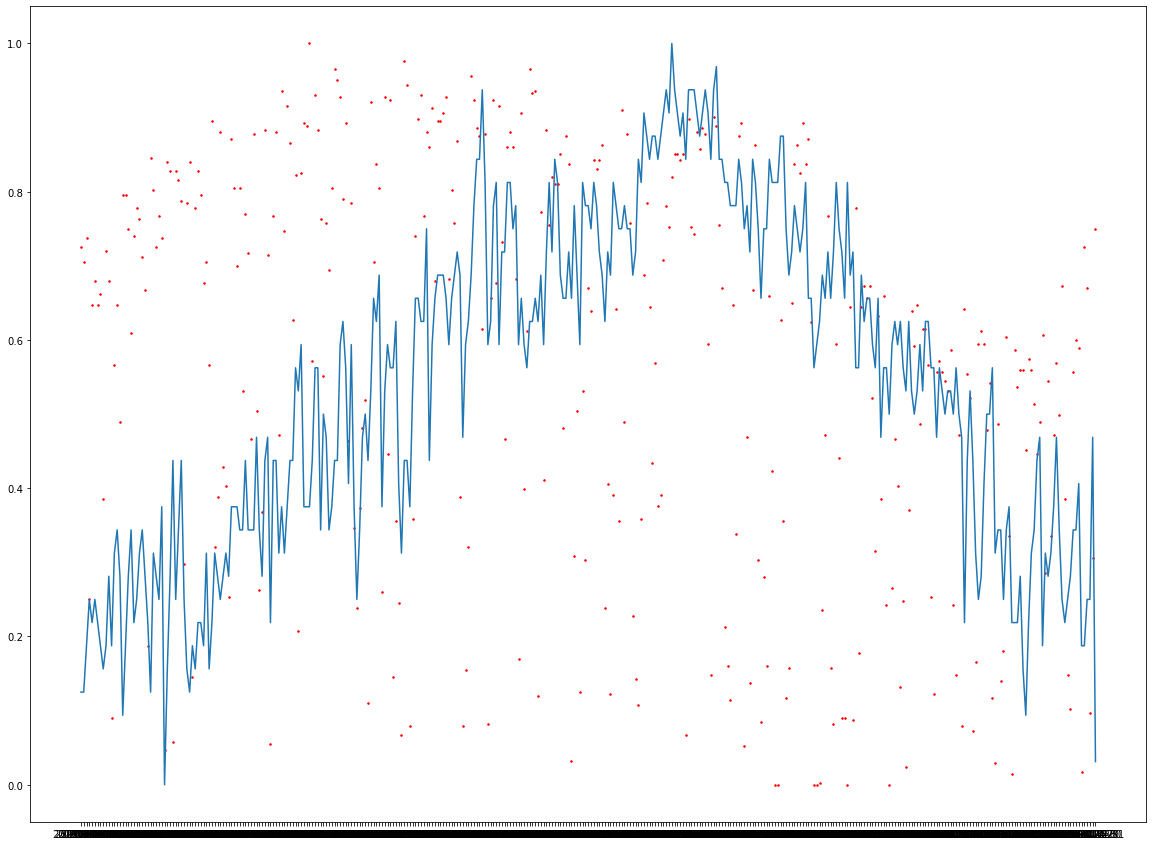

In [41]:
plt.figure(figsize=(20,15))

plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_energy'],'o',c='r',markersize=1.5)
plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_temp'],markersize=1)
#plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_Humidity'],markersize=1)
#plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_Cloud'],markersize=1)

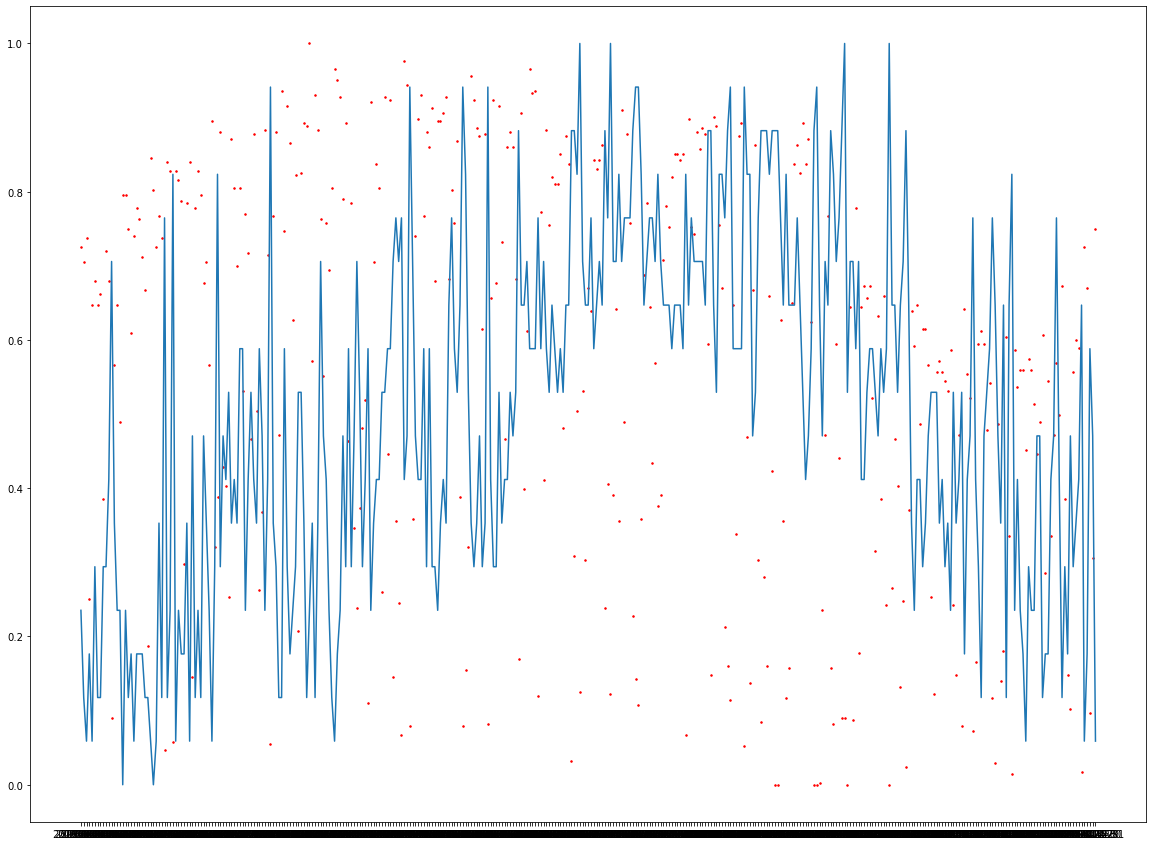

In [42]:
plt.figure(figsize=(20,15))

plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_energy'],'o',c='r',markersize=1.5)
#plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_temp'],markersize=1)
plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_Humidity'],markersize=1)
#plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_Cloud'],markersize=1)

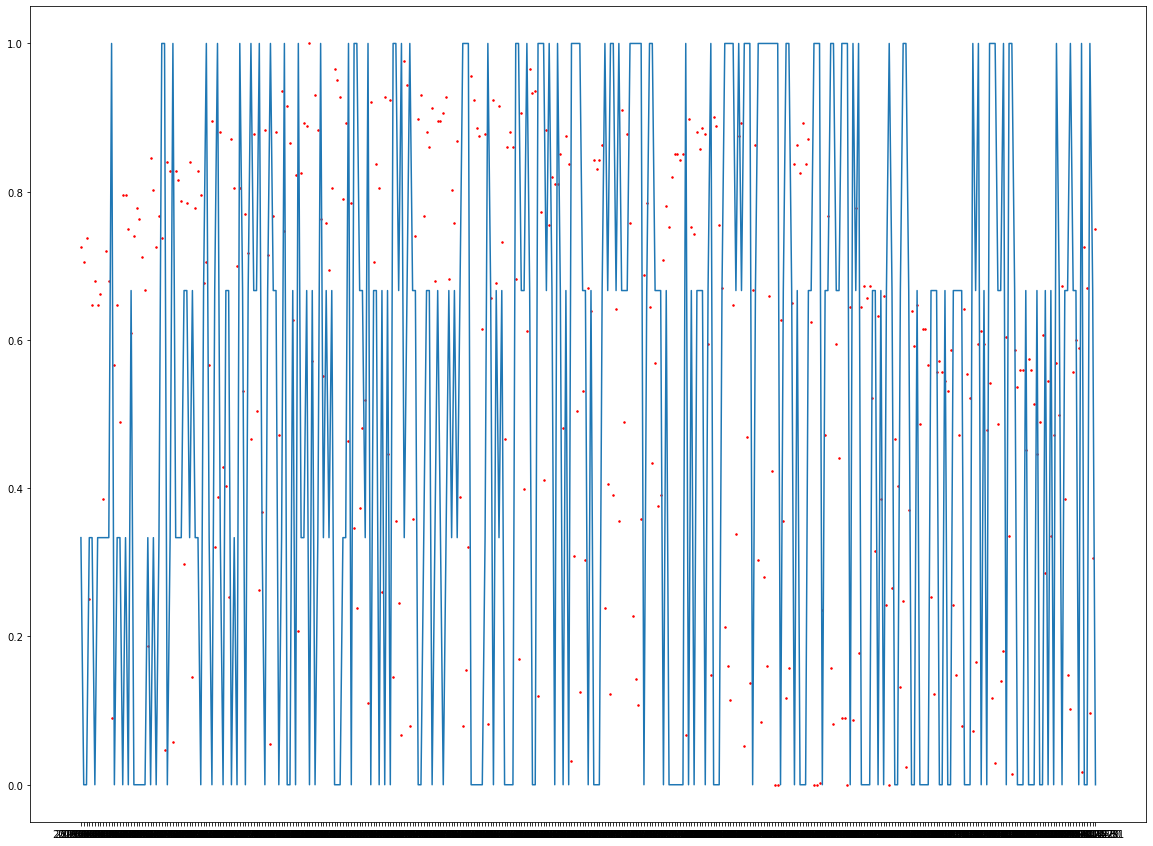

In [44]:
plt.figure(figsize=(20,15))

plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_energy'],'o',c='r',markersize=1.5)
#plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_temp'],markersize=1)
#plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_Humidity'],markersize=1)
plt.plot(fcst_energy_15_2019['date'], fcst_energy_15_2019['scale_Cloud'],markersize=1)